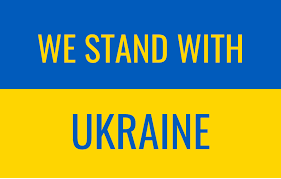

In [36]:
# import packages 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
from string import punctuation

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

np.set_printoptions(precision=2)
pd.set_option('display.max_columns', None)
%matplotlib inline
bin_size=10
plt.rcParams.update({'figure.max_open_warning': 0})
pd.set_option("max_rows", 30)
%pprint = False

Pretty printing has been turned ON


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amangupta/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
feb_27 = pd.read_csv('UkraineCombinedTweetsDeduped_FEB27.csv')
feb_28_pt1 =  pd.read_csv('UkraineCombinedTweetsDeduped_FEB28_part1.csv')
feb_28_pt2 =  pd.read_csv('UkraineCombinedTweetsDeduped_FEB28_part2.csv')

/Users/amangupta/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [38]:
df = pd.concat([feb_27, feb_28_pt1,feb_28_pt2], axis=0)

Keeping all the rows where the comments are in english and the comment has a location

In [39]:
df = df[(~df['location'].isnull()) & (df['language']=='en')]

In [40]:
df

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts
0,1141800,1466752038960656385,Curtin2Tiffany,I am just like everyone else. The universe ex...,"Colorado, USA",253,40,94,2021-12-03 12:52:22.000000,1497724980259262467,2022-02-27 00:07:16,5,#UkraineRussiaWar Captured Russian soldiers\n\...,"[{'text': 'UkraineRussiaWar', 'indices': [19, ...",en,NaN,0,2022-02-27 00:09:33.084131
4,1141804,1646145848,DrWAVeSportCd1,"Addicted to News, Music, Cooking, Gardens, Out...",USA,5002,3950,466629,2013-08-04 21:07:08.000000,1497724980653694976,2022-02-27 00:07:16,277,Ukrainian soldiers wearing sunflowers in their...,"[{'text': 'Ukraine', 'indices': [122, 130]}, {...",en,NaN,0,2022-02-27 00:09:33.043812
5,1141805,2191952909,WyvernReports,"In war, truth is the first casualty. Focus #Sy...",The Blue Marble,700,6424,20689,2013-11-22 21:51:19.000000,1497724980833968129,2022-02-27 00:07:16,565,russian troops destroyed a commercial oil base...,[],en,NaN,0,2022-02-27 00:09:33.035798
8,1141808,23611466,isunja,NaN,"Göteborg, Sweden",710,219,1328,2009-03-10 16:23:20.000000,1497724981157023749,2022-02-27 00:07:16,53,Some scenes from #Kyiv this morning: The build...,"[{'text': 'Kyiv', 'indices': [32, 37]}]",en,NaN,0,2022-02-27 00:09:33.003577
9,1141809,875055153157722112,manonatelier,WordPress • Designer Dork • Art Lover • Hometo...,NY/PA,2779,582,116858,2017-06-14 18:19:41.000000,1497724981538660357,2022-02-27 00:07:16,40,Meanwhile American “intelligence” pretended an...,[],en,NaN,0,2022-02-27 00:09:32.995537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140376,140376,1475841,sooooRob,"""Worry less about who you want to be and think...",San Francisco Bay Area,1469,415,7960,2007-03-19 06:09:50.000000,1498440720285253633,2022-02-28 23:31:22,1413,Can @POTUS arrange to have #Zelensky zoom into...,"[{'text': 'Zelensky', 'indices': [44, 53]}]",en,NaN,0,2022-02-28 23:32:03.529877
140377,140377,17363943,ulle_schauws,Feministin 🚺 🏳️‍🌈 Grüne Bundestagsabgeordnete ...,"Krefeld, Nordrhein-Westfalen",3384,7929,9166,2008-11-13 12:29:30.000000,1498440720528683008,2022-02-28 23:31:22,81,"The situation in #Ukraine is changing rapidly,...","[{'text': 'Ukraine', 'indices': [33, 41]}]",en,NaN,0,2022-02-28 23:32:03.514988
140378,140378,709334073278337024,rebeccaboltonuk,"Mostly here for the RHONY, RHOBH and RHOSLC chat",Manchester,158,104,3120,2016-03-14 11:03:16.000000,1498440720734109698,2022-02-28 23:31:22,4,A war where even librarians fight #UkraineRuss...,"[{'text': 'UkraineRussiaWar', 'indices': [53, ...",en,NaN,0,2022-02-28 23:32:03.500150
140379,140379,17185461,cratylus,"Programmer interested in Philosophy,Maths and ...","Perth, Australia",661,955,13348,2008-11-05 09:20:13.000000,1498440721015078914,2022-02-28 23:31:22,9,✍️The fifth day of Russian Invasion - summary ...,[],en,NaN,0,2022-02-28 23:32:03.485217


Clean the text to be used for analysis

In [41]:
def processComment(comment):
    # Remove HTML special entities (e.g. &amp;)
    comment = re.sub(r'\&\w*;', '', str(comment))
    #Convert @username to AT_USER
    comment = re.sub('@[^\s]+','', comment)
    # Remove tickers
    comment = re.sub(r'\$\w*', '', comment)
    # To lowercase
    comment = comment.lower()
    # Remove hyperlinks
    comment = re.sub(r'https?:\/\/.*\/\w*', '', comment)
    # Remove hashtags
    comment = re.sub(r'#\w*', '', comment)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    comment = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', comment)
    # Remove words with 2 or fewer letters
    comment = re.sub(r'\b\w{1,2}\b', '', comment)
    # Remove whitespace (including new line characters)
    comment = re.sub(r'\s\s+', ' ', comment)
    # Remove single space remaining at the front of the comment.
    #comment = tweet.lstrip('') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    comment = ''.join(c for c in comment if c <= '\uffff') 
    return comment

In [42]:
df['clean_text'] = df['text'].apply(lambda x: processComment(x) )

In [43]:
df = df.drop(['Unnamed: 0','userid','username','usercreatedts','tweetid','tweetcreatedts','language','extractedts'],axis=1)

In [44]:
df['clean_acct_desc'] = df['acctdesc'].apply(lambda x: processComment(x) )

In [45]:
df

,acctdesc,location,following,followers,totaltweets,retweetcount,text,hashtags,coordinates,favorite_count,clean_text,clean_acct_desc
0,I am just like everyone else. The universe ex...,"Colorado, USA",253,40,94,5,#UkraineRussiaWar Captured Russian soldiers\n\...,"[{'text': 'UkraineRussiaWar', 'indices': [19, ...",NaN,0,captured russian soldiers they said what thei...,just like everyone else the universe experien...
4,"Addicted to News, Music, Cooking, Gardens, Out...",USA,5002,3950,466629,277,Ukrainian soldiers wearing sunflowers in their...,"[{'text': 'Ukraine', 'indices': [122, 130]}, {...",NaN,0,ukrainian soldiers wearing sunflowers their ha...,addicted news music cooking gardens outdoors t...
5,"In war, truth is the first casualty. Focus #Sy...",The Blue Marble,700,6424,20689,565,russian troops destroyed a commercial oil base...,[],NaN,0,russian troops destroyed commercial oil base n...,war truth the first casualty focus contributo...
8,NaN,"Göteborg, Sweden",710,219,1328,53,Some scenes from #Kyiv this morning: The build...,"[{'text': 'Kyiv', 'indices': [32, 37]}]",NaN,0,some scenes from this morning the building lob...,nan
9,WordPress • Designer Dork • Art Lover • Hometo...,NY/PA,2779,582,116858,40,Meanwhile American “intelligence” pretended an...,[],NaN,0,meanwhile american “intelligence” pretended em...,wordpress • designer dork • art lover • hometo...
...,...,...,...,...,...,...,...,...,...,...,...,...
140376,"""Worry less about who you want to be and think...",San Francisco Bay Area,1469,415,7960,1413,Can @POTUS arrange to have #Zelensky zoom into...,"[{'text': 'Zelensky', 'indices': [44, 53]}]",NaN,0,can arrange have zoom into the state the union...,worry less about who you want and think more ...
140377,Feministin 🚺 🏳️‍🌈 Grüne Bundestagsabgeordnete ...,"Krefeld, Nordrhein-Westfalen",3384,7929,9166,81,"The situation in #Ukraine is changing rapidly,...","[{'text': 'Ukraine', 'indices': [33, 41]}]",NaN,0,the situation changing rapidly and are continu...,feministin ️‍ grüne bundestagsabgeordnete fil...
140378,"Mostly here for the RHONY, RHOBH and RHOSLC chat",Manchester,158,104,3120,4,A war where even librarians fight #UkraineRuss...,"[{'text': 'UkraineRussiaWar', 'indices': [53, ...",NaN,0,war where even librarians fight,mostly here for the rhony rhobh and rhoslc chat
140379,"Programmer interested in Philosophy,Maths and ...","Perth, Australia",661,955,13348,9,✍️The fifth day of Russian Invasion - summary ...,[],NaN,0,✍️the fifth day russian invasion summary situa...,programmer interested philosophy maths and poe...


Wordcloud to understand the types of people who are tweeting (account descriptions) - Profile of people tweeting: Students, mainly female (because of she/her in bio), democratic, conservative, writers, liberal etc

In [46]:
import pandas as pd
import numpy as np 
from string import punctuation
from textblob import TextBlob
import matplotlib.pyplot as plt 
import seaborn as sns 
from wordcloud import WordCloud, STOPWORDS
import re

In [16]:
big_string= df.clean_acct_desc.str.cat(sep='')

In [17]:
stopwords = ['and','not','are mine','are the','around the','with','are','the','from','nan','just','you are',
            'views are','all the','since','what you']
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(big_string)

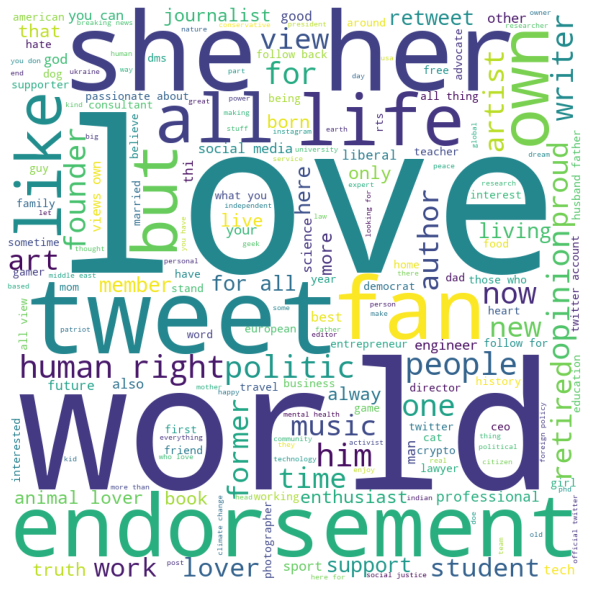

In [18]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Where are people tweeting from? 

In [37]:
big_string= df.location.str.cat(sep='')

In [42]:
stopwords = ['and','the','of','in','her','me','Land of','in my']
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(big_string)

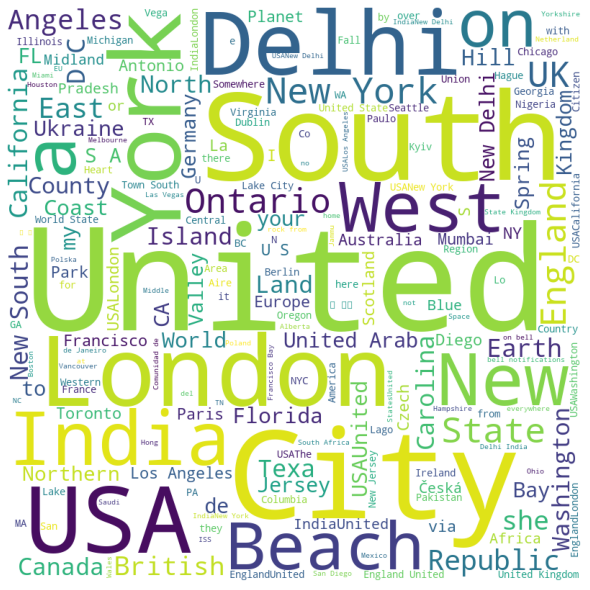

In [43]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

<AxesSubplot:>

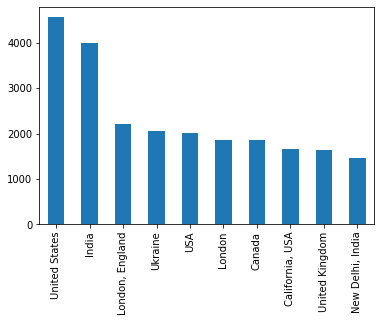

In [19]:
df['location'].value_counts()[:10].plot(kind='bar')

Labelling our data using textBlob to find sentiment of the tweets

In [47]:
from textblob import TextBlob
def get_sentiment(tweet):
    sentiment = TextBlob(tweet).sentiment
    return sentiment.polarity, sentiment.subjectivity

df['sentiment'] = df['clean_text'].apply(get_sentiment)

In [48]:
df['polarity'] = df['sentiment'].apply(lambda x:x[0])
df['subjectivity'] = df['sentiment'].apply(lambda x:x[1])

In [49]:
def round_sentiment(unrounded):
    if(unrounded > 0):
        return 1
    elif(unrounded == 0):
        return 0 
    else:
        return -1 
    

In [50]:
df['sentiment_val'] = df['polarity'].apply(round_sentiment)

<AxesSubplot:title={'center':'Sentiment breakdown for dataset'}, ylabel='sentiment_val'>

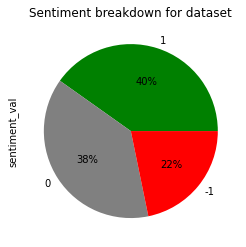

In [117]:
df.sentiment_val.value_counts().plot(kind='pie', autopct='%1.0f%%',
                                colors = ['green', 'gray', 'red'],
                                title='Sentiment breakdown for dataset')

In [114]:
df[['text','clean_text']]

,text,clean_text
0,#UkraineRussiaWar Captured Russian soldiers\n\...,captured russian soldiers they said what thei...
4,Ukrainian soldiers wearing sunflowers in their...,ukrainian soldiers wearing sunflowers their ha...
5,russian troops destroyed a commercial oil base...,russian troops destroyed commercial oil base n...
8,Some scenes from #Kyiv this morning: The build...,some scenes from this morning the building lob...
9,Meanwhile American “intelligence” pretended an...,meanwhile american “intelligence” pretended em...
...,...,...
140376,Can @POTUS arrange to have #Zelensky zoom into...,can arrange have zoom into the state the union...
140377,"The situation in #Ukraine is changing rapidly,...",the situation changing rapidly and are continu...
140378,A war where even librarians fight #UkraineRuss...,war where even librarians fight
140379,✍️The fifth day of Russian Invasion - summary ...,✍️the fifth day russian invasion summary situa...


In [52]:
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer and Stemmer.
    wordLemm = WordNetLemmatizer()

    for tweet in textdata:


        tweetwords = ''
        for word in tweet.split():
            # Checking if the word is a stopword.
            #if word not in stopwordlist:
            if len(word)>1:
                # Lemmatizing the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word+' ')
            
        processedText.append(tweetwords)
        
    return processedText

In [53]:
import time
import nltk
nltk.download('wordnet')
t = time.time()
processedtext = preprocess(df.clean_text)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amangupta/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Text Preprocessing complete.
Time Taken: 18 seconds


In [55]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


X_train, X_test, y_train, y_test = train_test_split(processedtext, df.sentiment_val,
                                                    test_size = 0.05, random_state = 0)
print(f'Data Split done.')

Data Split done.


In [56]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

Vectoriser fitted.
No. of feature_words:  500000


In [57]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


0.0

In [58]:
KNNModel = KNeighborsClassifier(n_neighbors=5)
KNNModel.fit(X_train, y_train)
ys_predict = KNNModel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

          -1       1.00      0.65      0.79      3102
           0       0.64      1.00      0.78      5302
           1       0.99      0.66      0.80      5646

    accuracy                           0.79     14050
   macro avg       0.88      0.77      0.79     14050
weighted avg       0.86      0.79      0.79     14050

Confusion Matrix: 
 [[2026 1069    7]
 [   3 5284   15]
 [   7 1894 3745]]
Accuracy Score: 
 0.7868327402135231


In [126]:
DTCModel = DecisionTreeClassifier(random_state=0)
DTCModel.fit(X_train, y_train)
ys_predict = DTCModel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

          -1       0.92      0.90      0.91      3102
           0       0.95      0.97      0.96      5302
           1       0.95      0.94      0.95      5646

    accuracy                           0.94     14050
   macro avg       0.94      0.94      0.94     14050
weighted avg       0.94      0.94      0.94     14050

Confusion Matrix: 
 [[2785  115  202]
 [  69 5145   88]
 [ 174  145 5327]]
Accuracy Score: 
 0.94355871886121


In [127]:
RFCModel = RandomForestClassifier(n_estimators=100)
RFCModel.fit(X_train, y_train)
ys_predict = RFCModel.predict(X_test)
#Display the outcome of classification
print('Classification Report: \n',metrics.classification_report(y_test, ys_predict))
print('Confusion Matrix: \n',metrics.confusion_matrix(y_test, ys_predict))
print('Accuracy Score: \n',metrics.accuracy_score(y_test, ys_predict))

Classification Report: 
               precision    recall  f1-score   support

          -1       0.98      0.85      0.91      3102
           0       0.92      0.98      0.95      5302
           1       0.94      0.95      0.95      5646

    accuracy                           0.94     14050
   macro avg       0.95      0.93      0.94     14050
weighted avg       0.94      0.94      0.94     14050

Confusion Matrix: 
 [[2627  231  244]
 [   6 5220   76]
 [  47  227 5372]]
Accuracy Score: 
 0.9408540925266904


In [59]:
X_train.shape

(266950, 500000)

In [90]:
y_train_d = keras.utils.to_categorical(y_train, 3)
y_test_d = keras.utils.to_categorical(y_test, 3)

In [96]:
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=10, activation='relu', input_shape=(500000,)))
model.add(Dense(units = 2, activation='relu'))
model.add(Dense(units = 3, activation='softmax'))

In [92]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 10)                5000010   
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 22        
_________________________________________________________________
dense_20 (Dense)             (None, 3)                 9         
Total params: 5,000,041
Trainable params: 5,000,041
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [107]:
import scipy
X_train.sort_indices()
X_test.sort_indices()

In [109]:
# TODO: Train the model for 20 epochs.
history = model.fit(
    X_train, y_train_d, epochs=1, verbose=1, validation_data=(X_test, y_test_d)
)

8343/8343 [==============================] - 138s 16ms/step - loss: 0.1343 - accuracy: 0.9567 - val_loss: 0.1662 - val_accuracy: 0.9478
